### Парсим данные через yfinance

In [11]:
# from utils.parser import parse_single_ticker

# parse_single_ticker(
#     ticker="MSFT",
#     path_to_save='data/',
#     timeframe='1d',
#     start_date='2020-01-01',
#     target_len=32,
#     history_len=256,
#     split_coef=0.1,
# )

In [1]:
# from utils.parser import parse_snp500

# parse_snp500(
#     path_to_save='data/',
#     timeframe='1d',
#     start_date='2020-01-01',
#     target_len=32,
#     history_len=256,
#     split_coef=0.1,
# )

### Получаем датасет

In [2]:
from utils.dataset import TradingDataset

dataset = TradingDataset(data_path='data/', mode='train')

Found 506620 samples for train mode


History shape: torch.Size([1, 256, 5])
Target shape: torch.Size([1, 32, 1])
Ticker: MU


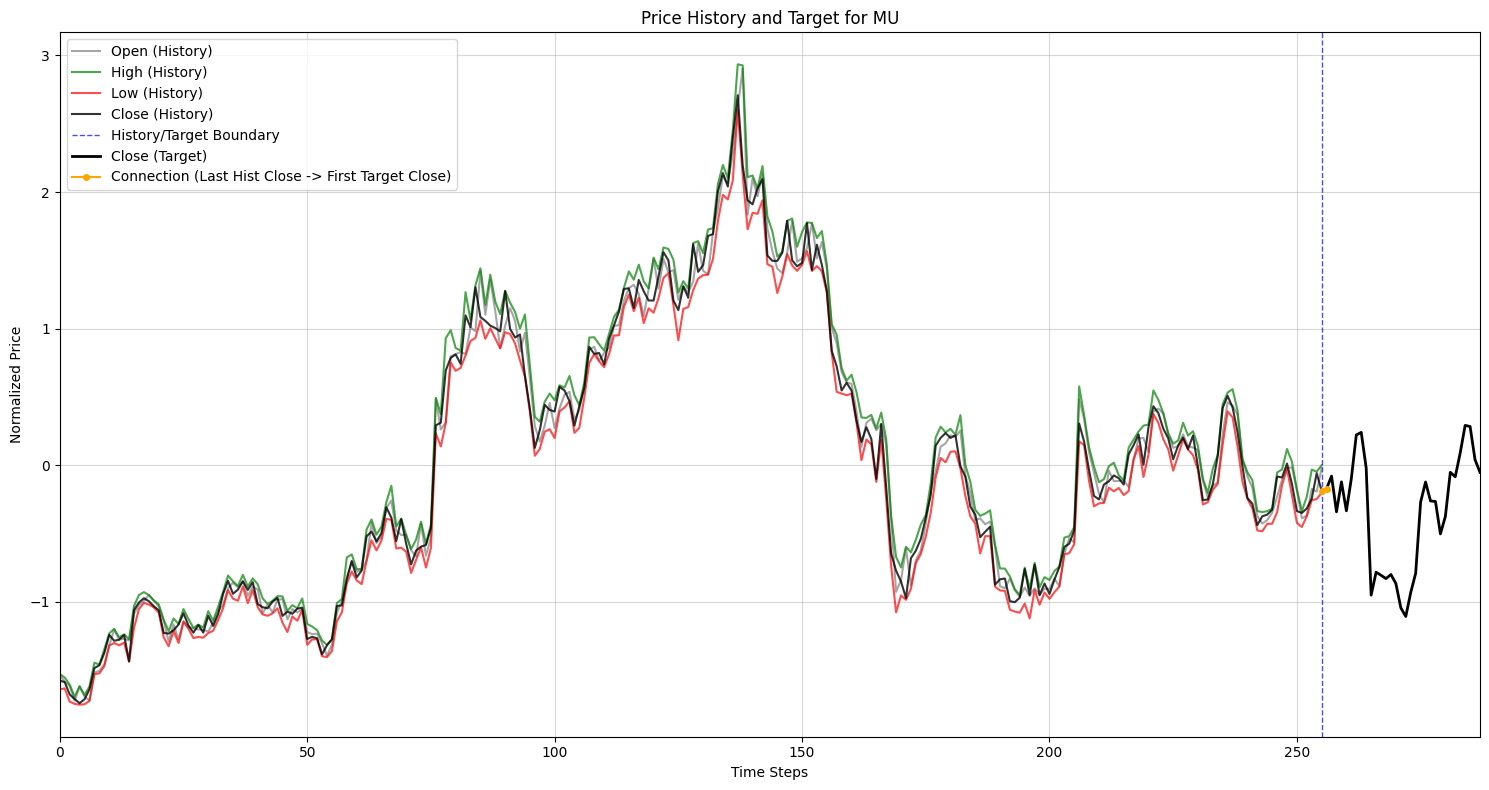

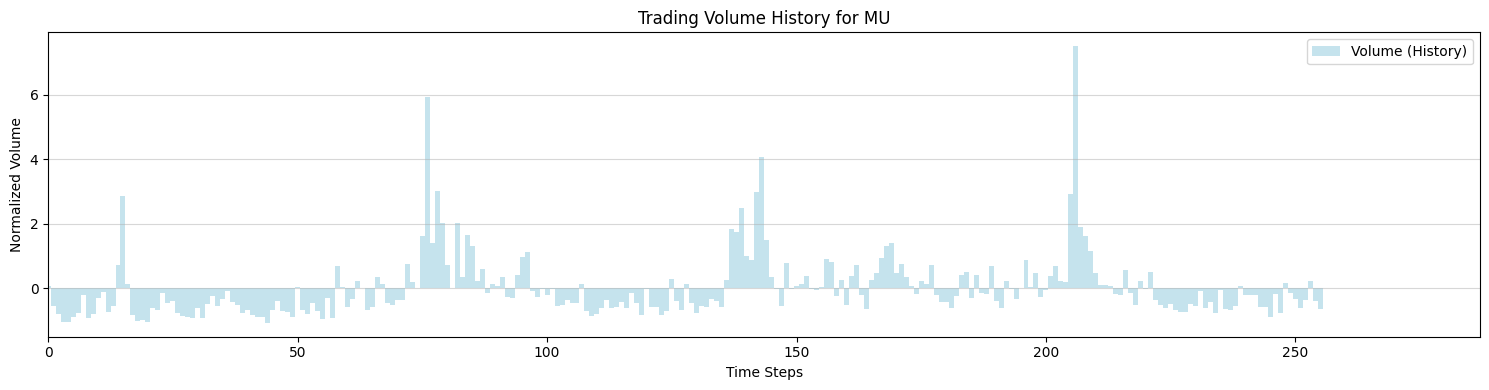

In [6]:
import torch
from utils.visualization import plot_dataset_sample

sample = dataset[torch.randint(0, len(dataset), (1,)).item()]

print("History shape:", sample['history'].shape)   # torch.Size([1, 256, 5])
print("Target shape:", sample['target'].shape)     # torch.Size([1, 32, 1])
print("Ticker:", sample['ticker'])

plot_dataset_sample(sample)

### Используем препроцессор

In [16]:
from utils.processor_xxl import TradingProcessor

processor = TradingProcessor()

processed_history = processor(sample['history'])
print(processed_history.shape)

torch.Size([1, 256, 128])


### Использование processor вместе с DataLoader

In [17]:
def collate_fn(example):
    histories = [item['history'] for item in example]
    targets = [item['target'] for item in example]
    tickers = [item['ticker'] for item in example]

    batch_histories = torch.cat(histories, dim=0)  
    batch_targets = torch.cat(targets, dim=0)      

    return {
        'history': batch_histories,
        'target': batch_targets,
        'ticker': tickers
    }


train_dataloader = torch.utils.data.DataLoader(
    dataset,
    shuffle=True,
    collate_fn=collate_fn,
    batch_size=4,
    num_workers=0,
)

batch = next(iter(train_dataloader))
print(batch['history'].shape)

processed_batch = processor(batch['history'])
print(processed_batch.shape)

torch.Size([4, 256, 5])
torch.Size([4, 256, 128])


### Отрисовка отдельных частей расширенной истории

In [44]:
# import matplotlib.pyplot as plt

# sample = dataset[torch.randint(0, len(dataset), (1,)).item()]
# processed_history = processor(sample['history'])

# plt.plot(processed_history[0, :, 0])
# plt.plot(processed_history[0, :, 1])
# plt.plot(processed_history[0, :, 2])
# plt.plot(processed_history[0, :, 3])
# plt.show()
# plt.plot(processed_history[0, :, torch.randint(0, 128, (1,)).item()])